In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**leia os dados de carros do seaborn:  car_crashes**

In [2]:
df_car = sns.load_dataset('car_crashes')

**Veja as informações da tabela:**
- Base contém valores nulos?
- Qual o dtype das variáveis?
- Qual a proporção das variáveis categóricas?
- Qual a distribuição de variáveis numéricas?

In [3]:
df_car.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
df_car.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [4]:
df_car_cat = df_car.select_dtypes(include='O')
df_car_num = df_car.select_dtypes(exclude='O')

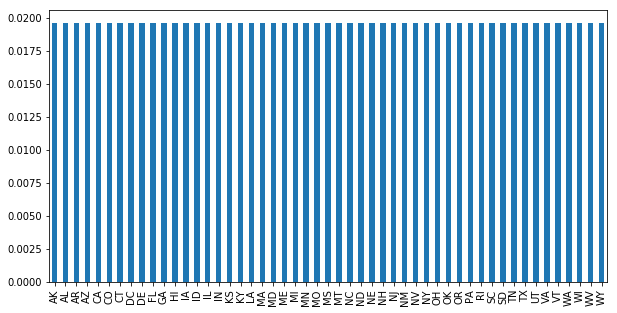

In [17]:
df_car_cat['abbrev'].value_counts(True).sort_index().plot.bar(figsize=(10, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F11950FF98>,
      dtype=object)

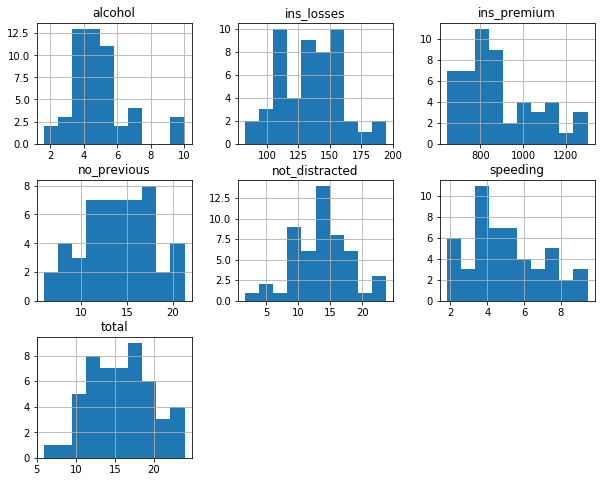

In [18]:
df_car_num.hist(figsize=(10, 8))

**Veja como esta a variação da coluna total com o boxplot**

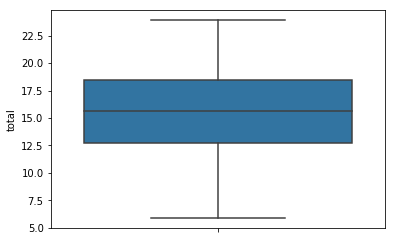

In [19]:
sns.boxplot(data=df_car,y='total')

**Veja como esta a variação de todas as colunas com variáveis númericas com o boxplot**

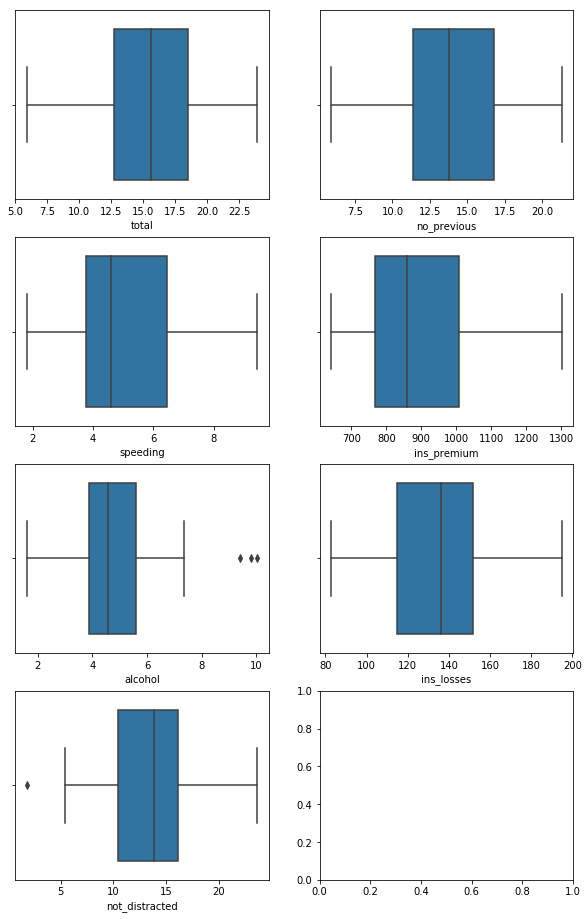

In [20]:
df_num = df_car.select_dtypes(exclude='O')

from math import ceil

df_num_1 = df_num.columns[:ceil(df_num.shape[1]/2)]
df_num_2 = df_num.columns[ceil(df_num.shape[1]/2):]

fig, ax = plt.subplots(ceil(df_num.shape[1]/2), 2, figsize=(10, 16))


for i, col in enumerate(df_num_1):
    sns.boxplot(data=df_num, x=col, ax=ax[i][0])
    
for i, col in enumerate(df_num_2):
    sns.boxplot(data=df_num, x=col, ax=ax[i][1])

**Veja média, o maximo e argumento maximo dos total**

In [25]:
print(f'Média {df_car["total"].mean()}')
print(f'Máximo {df_car["total"].max()}')
print(f'Arg max {df_car["total"].idxmax()}')

Média 15.79019607843137
Máximo 23.9
Arg max 34


**Veja os dados do argumento maximo, qual é o estado?**

In [27]:
df_car.loc[34,'abbrev']

'ND'

**Agora veja os dados de todos os estados** 

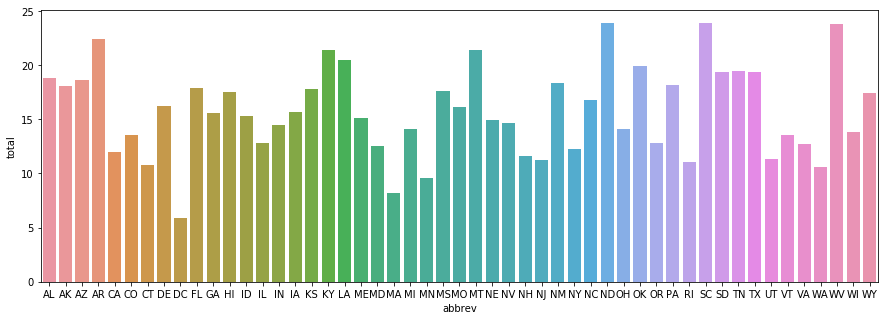

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_car,x='abbrev',y='total')

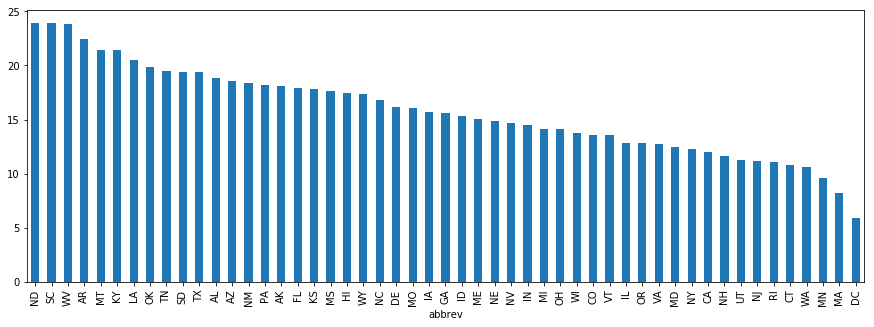

In [28]:
# ou algernativamente
df_car.groupby('abbrev')['total'].sum().sort_values(ascending=False).plot.bar(figsize=(15, 5))

**Veja a corelação entre alcool e o total**

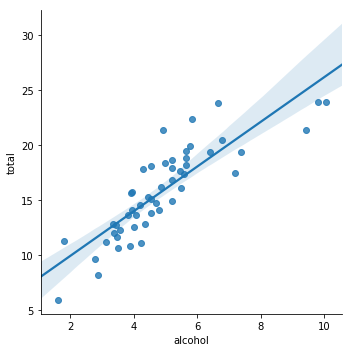

In [10]:
sns.lmplot(data=df_car,x='alcohol',y='total')

**Veja a correlação para todas combinações de variáveis numéricas**
Dica: pairplot

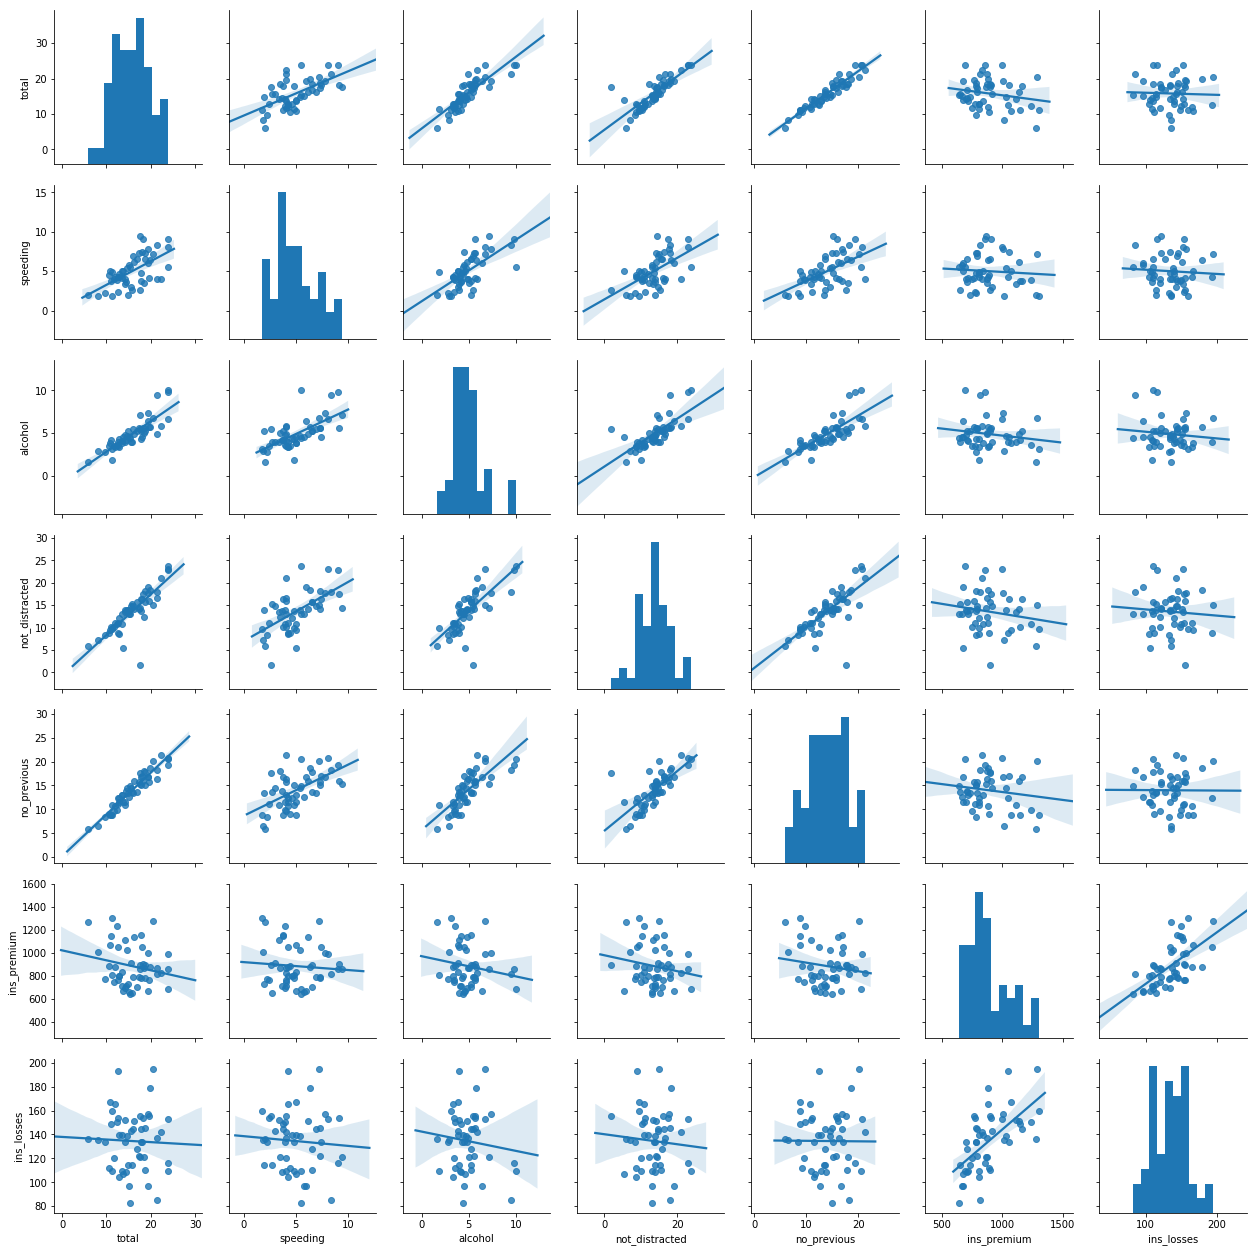

In [11]:
sns.pairplot(df_car, kind="reg", )

**Veja a correlação para todos combinações de variáveis numéricas**
Agora use o heatmap

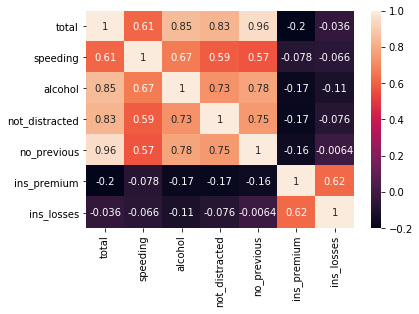

In [13]:
sns.heatmap(df_car.corr(), annot=True)

## Plots categoricos 

**Pegue os dados do titanic**

In [2]:
import seaborn as sns

In [3]:
df_titanic = sns.load_dataset('titanic')

**Verifique quantos homens e mulheres sobreviveram ou não**

In [5]:
sns.countplot(data=df_titanic, x='Survived', hue='Sex')

ValueError: Could not interpret input 'Survived'

**verifique agora quantas pessoas exitem em cada classe** 

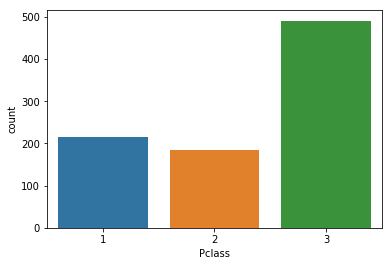

In [24]:
sns.countplot(df_titanic['Pclass'])

**quantas pessoas sobreviveram em de cada classe?**

In [11]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
pd.crosstab(df_titanic['pclass'], df_titanic['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


**Veja o histograma dos dados da idade dos usuarios**

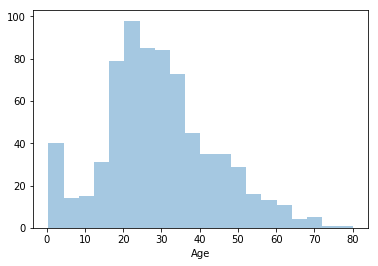

In [27]:
sns.distplot(df_titanic['Age'].dropna(),kde=False)

**Faça dois histogramas das idades, com as pessoas que sobreviveram e não sobreviveram**

In [28]:
df_titan_surv_1 = df_titanic[df_titanic['Survived']==1]
df_titan_surv_0 = df_titanic[df_titanic['Survived']==0]

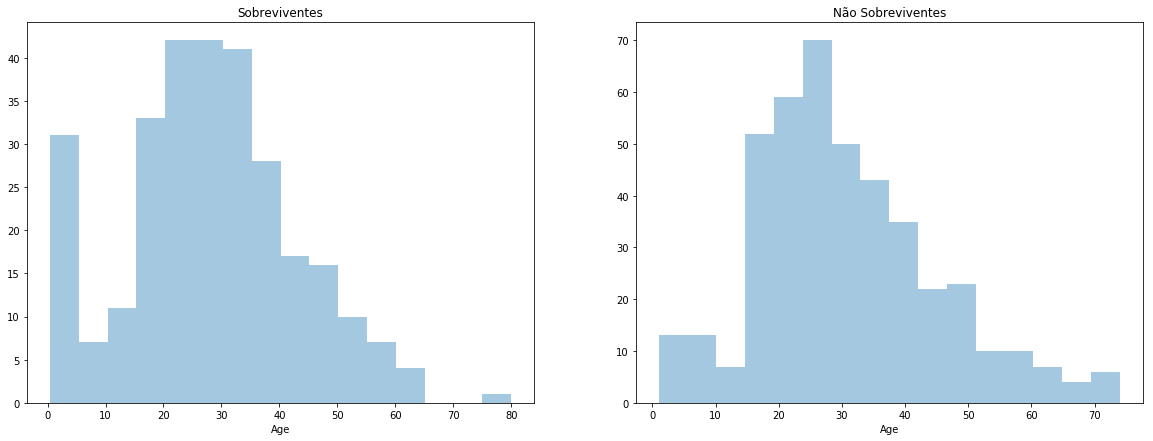

In [29]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("Sobreviventes")
sns.distplot(df_titan_surv_1['Age'].drop
             na(),kde=False)
plt.subplot(1,2,2)
plt.title("Não Sobreviventes")
sns.distplot(df_titan_surv_0['Age'].dropna(),kde=False)